# P3 


This project gives you experience with getting data from the web. 



### Autograder Setup

The next code cell should be uncommented to run the autograder tests when using Colab/DeepNote. If you are using an environment with `otter-grader` already installed (your own machine, lab machines), then do not uncomment the code.

In [ ]:
# !pip install otter-grader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


You will have access to a few tests for the project. Note, when you submit the autograder will run additional "hidden" tests on your solutions.

Please comment out this cell before submitting.

In [ ]:
# !wget https://pages.mtu.edu/~lebrown/un5550-f22/projects/p3/p3.files.zip
# !unzip p3.files.zip

--2022-10-16 23:06:48--  https://pages.mtu.edu/~lebrown/un5550-f22/projects/p3/p3.files.zip
Resolving pages.mtu.edu (pages.mtu.edu)... 141.219.70.232
Connecting to pages.mtu.edu (pages.mtu.edu)|141.219.70.232|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1730 (1.7K) [application/zip]
Saving to: ‘p3.files.zip.1’

p3.files.zip.1      100%[===================>]   1.69K  --.-KB/s    in 0s      

2022-10-16 23:06:48 (478 MB/s) - ‘p3.files.zip.1’ saved [1730/1730]

Archive:  p3.files.zip
replace tests/q1.py? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace tests/q4.py? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace tests/q3.py? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace tests/q2.py? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [ ]:
import pandas as pd 
import numpy as np
from bs4 import BeautifulSoup
import requests 
import re 
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

import otter
grader = otter.Notebook()

**NOTE** A note on grading for this project.  
Each question has the totoal points listed which will be split between autograding methods and manual grading review your code to achieve the requested result.   

## Q1 - (5 pts total)

Scrape [https://www.data.gov](https://www.data.gov) to identify and print out the number of data sets available.

In [ ]:
site = requests.get('https://www.data.gov').text
q1 = BeautifulSoup(site, 'html5lib')

In [ ]:
# find number a number with a possible comma in the middle, remove the comma, and turn into an integer
pattern = r'\d+,?\d*'
# total_datasets should be an integer
total_datasets = int(re.search(pattern, q1.find('small').a.text).group().replace(',', ''))
print("The number of datasets is ", str(total_datasets))

The number of datasets is  335221


In [ ]:
grader.check("q1")

q1 results: All test cases passed!

## Q2 - (20 pts total) 

You will be looking at the votes for U.S. Senate in the 117th Congress 1st session (2021).  In particular, we are seeking to identify the items that were rejected by a margin of less than 5 votes.  

Report in a DataFrame which items match this criteria.  
The DataFrame should have separate columns for the vote number, the tally, questions: description, and issue. 

Data available at: https://www.senate.gov/legislative/LIS/roll_call_lists/vote_menu_117_1.htm

Consider completing one of the following methods: 
* using pandas read_html 
* using BeautifulSoup to parse the information. 

In [ ]:
url = "https://www.senate.gov/legislative/LIS/roll_call_lists/vote_menu_117_1.htm"
headers = {"User-agent":
           "Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/47.0.2526.80 Safari/537.36"}
site = requests.get(url, headers=headers).text
q2 = BeautifulSoup(site, 'html5lib')

In [ ]:
# Use one of the two methods to get the Senate votes data 
# Filter/Select only those items that are rejected with a margin 
#  of less than 5 votes.  
# Report in a DataFrame 'tableRejVotes' with columns of: 
#  vote number 'Vnum', tally 'Tally', question: description 'Desc', 
#  and issue 'Issue'
# read table from html and turn into a df
tableRejVotes_temp = pd.read_html(site)[0]
# leave only rejected results
tableRejVotes_temp = tableRejVotes_temp[tableRejVotes_temp['Result'] == 'Rejected']
# create an empty df
tableRejVotes = pd.DataFrame()
# create a column for Vnum
tableRejVotes['Vnum'] = tableRejVotes_temp['Vote (Tally)'].apply(lambda x: int(re.search('^\d\d*',x).group()))
# create a column for Tally
tableRejVotes['Tally'] = tableRejVotes_temp['Vote (Tally)'].apply(lambda x: re.search('\d*-\d*',x).group())
# create a temorary column for tally difference
tableRejVotes['Tally_Diff'] = tableRejVotes['Tally'].apply(lambda x: abs(int(x.split('-')[0]) - int(x.split('-')[1])))
# create a column for description
tableRejVotes['Desc'] = tableRejVotes_temp['Question: Description']
# create a column for Issue
tableRejVotes['Issue'] = tableRejVotes_temp['Issue']
# leave only columns with tally difference less than 5
tableRejVotes = tableRejVotes[tableRejVotes['Tally_Diff'] < 5]
# remove the temporary column
tableRejVotes = tableRejVotes.loc[:, tableRejVotes.columns != 'Tally_Diff']
print ("Number of rejected votes with margin < 5 : " + 
       str(tableRejVotes.shape[0]))

Number of rejected votes with margin < 5 : 91


In [ ]:
tableRejVotes.head()

,Vnum,Tally,Desc,Issue
52,476,48-50,On the Amendment S.Amdt. 4868: Marshall Amdt. ...,H.R. 6119
69,459,50-49,On Cloture on the Motion to Proceed: Motion to...,S. 4
108,420,49-51,On Cloture on the Motion to Proceed: Motion to...,S. 2747
133,395,50-50,On the Amendment S.Amdt. 3831: Marshall Amdt. ...,H.R. 5305
134,394,50-50,On the Amendment S.Amdt. 3833: Cotton Amdt. No...,H.R. 5305


In [ ]:
grader.check("q2")

q2 results: All test cases passed!

## Q3 - (20 pts total) 

From the list of top 200 most popular names for babies born in the US in the 2010s.  We are interested in the names that start with 'W' or contain a letter  'P' or 'p'.  

Create a DataFrame with the names that start with 'W' or contain a letter  'P' or 'p' (for both male and female together), their rank, and the number of times the name is used.  DataFrame has four columns: "Rank" - int, "Names" - str, "Number" - int, and "Gender" - str - "Male"/"Female". 

Examples names from the table are: 
* 4, William, 159773
* 37, Wyatt, 87644
* 118, Willow, 26999
* 44, Penelope, 47570
* 64, Peyton, 39582
* ... 

Display the first 10 rows of the DataFrame, sorted by decreasing number.  Also, print out the sum of the number of the 'W' names and the sum of the number of names with 'P' or 'p'.  

Data available at: https://www.ssa.gov/OACT/babynames/decades/names2010s.html

In [ ]:
site = requests.get('https://www.ssa.gov/OACT/babynames/decades/names2010s.html').text
q3 = BeautifulSoup(site, 'html5lib')

In [ ]:
...

Ellipsis

In [ ]:
# Create a DataFrame 'names' for the names that start with W or have a P/p
# The 'names' DataFrame has four colummns: 
#   'Rank' (int) 
#   'Name' (str)
#   'Num' (int) 
#   'Gender' (str) 'Female' / 'Male'
# read from html and drop the last row
names = pd.read_html(site)[0]
names.drop(index=names.index[-1], axis=0, inplace=True)
# rename columns
names.columns = ['Rank','Name_Male','Num_Male','Name_Female','Num_Female']
# create df for male
names_male = pd.DataFrame(dict(Rank = names['Rank'], Name = names['Name_Male'], Num = names['Num_Male']))
names_male['Gender'] = 'Male'
# create df for female
names_female = pd.DataFrame(dict(Rank = names['Rank'], Name = names['Name_Female'], Num = names['Num_Female']))
names_female['Gender'] = 'Female'
# concat male and female dfs and set column data types
names = pd.concat([names_male, names_female], axis=0)
names['Rank'] = names['Rank'].astype('int')
names['Name'] = names['Name'].astype('str') 
names['Num'] = names['Num'].astype('int') 
names['Gender'] = names['Gender'].astype('str')
# sort name df by Num
names.sort_values(by=['Num'], inplace=True, ascending=False)
# indices of names beginning with W
Wnames = names['Name'].apply(lambda x: re.findall('^W.*',x)).astype(bool)
Wnames_list = [i for i, name in enumerate(Wnames) if name]
# indices of names with a P/p
Pnames = names['Name'].apply(lambda x: re.findall('.*[Pp].*',x)).astype(bool)
Pnames_list = [i for i, name in enumerate(Pnames) if name]
# the sum of the names beginning with W
numWnames = names.iloc[Wnames_list]['Num'].sum()
# the sum of the names with a P/p
numPnames = names.iloc[Pnames_list]['Num'].sum()
# get indices for names df and filter names df
names_list = sorted(Wnames_list + Pnames_list)
names = names.iloc[names_list]

print("Total number of names that start with W  : " + str(numWnames))
print("Total number of names that contain P/p   : " + str(numPnames))

names.head(10)

Total number of names that start with W  : 334332
Total number of names that contain P/p   : 895223


,Rank,Name,Num,Gender
2,3,Sophia,180953,Female
3,4,William,159773,Male
19,20,Joseph,115497,Male
26,27,Christopher,101968,Male
36,37,Wyatt,87644,Male
15,16,Harper,85111,Female
82,83,Cooper,49232,Male
83,84,Parker,49187,Male
43,44,Penelope,47570,Female
63,64,Peyton,39582,Female


In [ ]:
grader.check("q3")

q3 results: All test cases passed!

## Q4 - (20 pts total) 

Use Python to scrape the articles posted to https://techcrunch.com/  front page under "The Latest", and report this in a DataFrame.  

The columns of the DataFrame `news` should be:

* 'Title' - article title, type `object` *string*
* 'Date' - publish date, type `datetime64[ns, tz]` _will have to convert to this type_
* 'Author' - author, type `object` *string*

Note: be respectful to the website (obey robots.txt information) and do not repeatedly access the site.


In [ ]:
html = requests.get("https://techcrunch.com").text
soup = BeautifulSoup(html, 'html5lib')

In [ ]:
# Pull information from website into DataFrame 'news'
#  'news' has columns: 
#     - 'Title', str 
#     - 'Date', datetime object 
#     - 'Author', str
# create emty lists for rach column
Title = []
Date = []
Author = []
# loop over each article and add information to each column
for article in soup.find_all('header'):
  Title.append(article.a.text.strip())
  Date.append(article.div.time.attrs['datetime'])
  Author.append(article.span.text.strip().replace('\t', ''))
news = pd.DataFrame(data = [Title, Date, Author]).transpose()
news.columns = ['Title', 'Date', 'Author']
news['Date'] = pd.to_datetime(news['Date'])

news

,Title,Date,Author
0,"Why Cruise is making its own chips, and a lot ...",2022-10-16 16:05:56-07:00,Roberto Baldwin
1,"Top climate tech deals net nearly $4B in Q3, o...",2022-10-16 11:00:47-07:00,Tim De Chant
2,"With a $13B valuation, Celonis defies current ...",2022-10-16 10:00:14-07:00,Ron Miller
3,Even decacorns have their challenges,2022-10-16 07:16:24-07:00,Mary Ann Azevedo
4,India launches 75 digital banking units across...,2022-10-16 01:32:24-07:00,Manish Singh
5,"Meta announces legs, Hulu raises prices, and M...",2022-10-15 13:15:36-07:00,Greg Kumparak
6,Zombie startups,2022-10-15 11:01:54-07:00,Natasha Mascarenhas
7,"This Week in Apps: Play Store revamp, Google a...",2022-10-15 11:00:25-07:00,Sarah Perez
8,"Pay as you drive, or pay how you drive?",2022-10-15 10:00:32-07:00,Anna Heim
9,"Starlink isn’t a charity, but the Ukraine war ...",2022-10-15 08:02:59-07:00,Devin Coldewey


In [ ]:
grader.check("q4")

q4 results: All test cases passed!

<!-- BEGIN QUESTION -->

## Bonus - (4 points) 

Going back to the names data from Q3.  Let's look at how the distribution of popular names has changed over time. 

Create a small multiples plot (meaning each plot is the same type and showing similar information in a grid).  

The small multiples plot will show how the distribution of names has changed from the 1960s to 2010s.  

1960s data - https://www.ssa.gov/OACT/babynames/decades/names1960s.html  
1970s data - https://www.ssa.gov/OACT/babynames/decades/names1970s.html  
...  
2010s data - https://www.ssa.gov/OACT/babynames/decades/names2010s.html

Let's focus on just how the distribution of girls names have changed.  This can be displayed using a line plot on just the top 100 names per decade.

When getting the information, you should also scrape the total number of female births in that period to normalize the number of names as a percent in that decade. 


Your final grid should display: 

|         | Col 1 | Col 2 | 
|-------|-----------|-----------|
| Row 1 | 1960 plot | 1970 plot | 
| Row 2 | 1980 plot | 1990 plot | 
| Row 3 | 2000 plot | 2010 plot | 



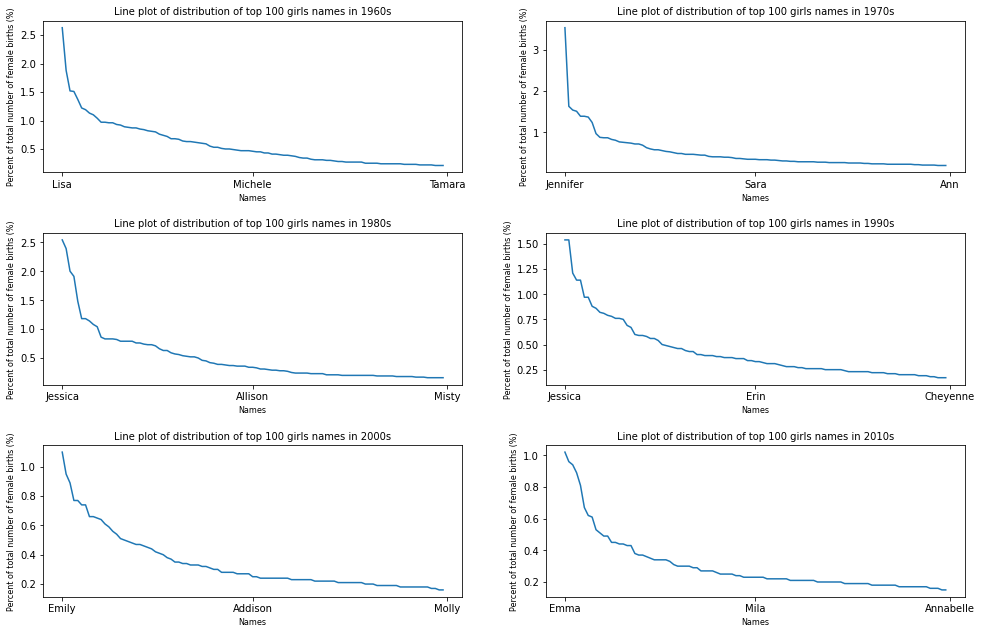

In [ ]:
# Create small multiples plot.
# for 1960 
sixty = requests.get('https://www.ssa.gov/OACT/babynames/decades/names1960s.html').text
sixty_soup = BeautifulSoup(sixty, 'html5lib')
# read from html and drop the last row
sixty_df = pd.read_html(sixty)[0]
sixty_df.drop(index=sixty_df.index[-1], axis=0, inplace=True)
# rename columns
sixty_df.columns = ['Rank','Name_Male','Num_Male','Name_Female','Num_Female']
# find female births number for that year
sixty_f_birth_text = sixty_soup.find('div', class_='m-pa2').text
pattern = r'(\d+.*) female births'
sixty_f_birth = int(re.search(pattern, sixty_f_birth_text).group(1).replace(',',''))
# create a proportion df for female names
sixty_df['Num_Female'] = sixty_df['Num_Female'].astype('int')
sixty_prop = pd.DataFrame(dict(Name = sixty_df['Name_Female'],
  Name_perc = round(100*sixty_df['Num_Female']/sixty_f_birth, 2)))
##
# for 1970 
seventy = requests.get('https://www.ssa.gov/OACT/babynames/decades/names1970s.html').text
seventy_soup = BeautifulSoup(seventy, 'html5lib')
# read from html and drop the last row
seventy_df = pd.read_html(seventy)[0]
seventy_df.drop(index=seventy_df.index[-1], axis=0, inplace=True)
# rename columns
seventy_df.columns = ['Rank','Name_Male','Num_Male','Name_Female','Num_Female']
# find female births number for that year
seventy_f_birth_text = seventy_soup.find('div', class_='m-pa2').text
pattern = r'(\d+.*) female births'
seventy_f_birth = int(re.search(pattern, seventy_f_birth_text).group(1).replace(',',''))
# create a proportion df for female names
seventy_df['Num_Female'] = seventy_df['Num_Female'].astype('int')
seventy_prop = pd.DataFrame(dict(Name = seventy_df['Name_Female'],
  Name_perc = round(100*seventy_df['Num_Female']/seventy_f_birth, 2)))
# for 1980 
eighty = requests.get('https://www.ssa.gov/OACT/babynames/decades/names1980s.html').text
eighty_soup = BeautifulSoup(eighty, 'html5lib')
# read from html and drop the last row
eighty_df = pd.read_html(eighty)[0]
eighty_df.drop(index=eighty_df.index[-1], axis=0, inplace=True)
# rename columns
eighty_df.columns = ['Rank','Name_Male','Num_Male','Name_Female','Num_Female']
# find female births number for that year
eighty_f_birth_text = eighty_soup.find('div', class_='m-pa2').text
pattern = r'(\d+.*) female births'
eighty_f_birth = int(re.search(pattern, eighty_f_birth_text).group(1).replace(',',''))
# create a proportion df for female names
eighty_df['Num_Female'] = eighty_df['Num_Female'].astype('int')
eighty_prop = pd.DataFrame(dict(Name = eighty_df['Name_Female'],
  Name_perc = round(100*eighty_df['Num_Female']/eighty_f_birth, 2)))
# for 1990 
ninety = requests.get('https://www.ssa.gov/OACT/babynames/decades/names1990s.html').text
ninety_soup = BeautifulSoup(ninety, 'html5lib')
# read from html and drop the last row
ninety_df = pd.read_html(ninety)[0]
ninety_df.drop(index=ninety_df.index[-1], axis=0, inplace=True)
# rename columns
ninety_df.columns = ['Rank','Name_Male','Num_Male','Name_Female','Num_Female']
# find female births number for that year
ninety_f_birth_text = ninety_soup.find('div', class_='m-pa2').text
pattern = r'(\d+.*) female births'
ninety_f_birth = int(re.search(pattern, ninety_f_birth_text).group(1).replace(',',''))
# create a proportion df for female names
ninety_df['Num_Female'] = ninety_df['Num_Female'].astype('int')
ninety_prop = pd.DataFrame(dict(Name = ninety_df['Name_Female'],
  Name_perc = round(100*ninety_df['Num_Female']/ninety_f_birth, 2)))
# for 2000 
zero = requests.get('https://www.ssa.gov/OACT/babynames/decades/names2000s.html').text
zero_soup = BeautifulSoup(zero, 'html5lib')
# read from html and drop the last row
zero_df = pd.read_html(zero)[0]
zero_df.drop(index=zero_df.index[-1], axis=0, inplace=True)
# rename columns
zero_df.columns = ['Rank','Name_Male','Num_Male','Name_Female','Num_Female']
# find female births number for that year
zero_f_birth_text = zero_soup.find('div', class_='m-pa2').text
pattern = r'(\d+.*) female births'
zero_f_birth = int(re.search(pattern, zero_f_birth_text).group(1).replace(',',''))
# create a proportion df for female names
zero_df['Num_Female'] = zero_df['Num_Female'].astype('int')
zero_prop = pd.DataFrame(dict(Name = zero_df['Name_Female'],
  Name_perc = round(100*zero_df['Num_Female']/zero_f_birth, 2)))
# for 2010 
ten = requests.get('https://www.ssa.gov/OACT/babynames/decades/names2010s.html').text
ten_soup = BeautifulSoup(ten, 'html5lib')
# read from html and drop the last row
ten_df = pd.read_html(ten)[0]
ten_df.drop(index=ten_df.index[-1], axis=0, inplace=True)
# rename columns
ten_df.columns = ['Rank','Name_Male','Num_Male','Name_Female','Num_Female']
# find female births number for that year
ten_f_birth_text = ten_soup.find('div', class_='m-pa2').text
pattern = r'(\d+.*) female births'
ten_f_birth = int(re.search(pattern, ten_f_birth_text).group(1).replace(',',''))
# create a proportion df for female names
ten_df['Num_Female'] = ten_df['Num_Female'].astype('int')
ten_prop = pd.DataFrame(dict(Name = ten_df['Name_Female'],
  Name_perc = round(100*ten_df['Num_Female']/ten_f_birth, 2)))
##
# plot a line graph for 1960
plt.figure(figsize=(16,10))
plt.subplot(3,2,1)
plt.plot(sixty_prop['Name'][0:99], sixty_prop['Name_perc'][0:99], linestyle='-')
plt.title('Line plot of distribution of top 100 girls names in 1960s', fontsize=10)
plt.xlabel('Names', fontsize=8)
plt.ylabel('Percent of total number of female births (%)', fontsize=8)
x_ticks = [sixty_prop['Name'][0], sixty_prop['Name'][49], sixty_prop['Name'][99]]
x_labels = [sixty_prop['Name'][0], sixty_prop['Name'][49], sixty_prop['Name'][99]] 
plt.xticks(ticks=x_ticks, labels=x_labels)
# plot a line graph for 1970
plt.subplot(3,2,2)
plt.plot(seventy_prop['Name'][0:99], seventy_prop['Name_perc'][0:99], linestyle='-')
plt.title('Line plot of distribution of top 100 girls names in 1970s', fontsize=10)
plt.xlabel('Names', fontsize=8)
plt.ylabel('Percent of total number of female births (%)', fontsize=8)
x_ticks = [seventy_prop['Name'][0], seventy_prop['Name'][49], seventy_prop['Name'][99]]
x_labels = [seventy_prop['Name'][0], seventy_prop['Name'][49], seventy_prop['Name'][99]] 
plt.xticks(ticks=x_ticks, labels=x_labels)
# plot a line graph for 1980
plt.subplot(3,2,3)
plt.plot(eighty_prop['Name'][0:99], eighty_prop['Name_perc'][0:99], linestyle='-')
plt.title('Line plot of distribution of top 100 girls names in 1980s', fontsize=10)
plt.xlabel('Names', fontsize=8)
plt.ylabel('Percent of total number of female births (%)', fontsize=8)
x_ticks = [eighty_prop['Name'][0], eighty_prop['Name'][49], eighty_prop['Name'][99]]
x_labels = [eighty_prop['Name'][0], eighty_prop['Name'][49], eighty_prop['Name'][99]] 
plt.xticks(ticks=x_ticks, labels=x_labels)
# plot a line graph for 1990
plt.subplot(3,2,4)
plt.plot(ninety_prop['Name'][0:99], ninety_prop['Name_perc'][0:99], linestyle='-')
plt.title('Line plot of distribution of top 100 girls names in 1990s', fontsize=10)
plt.xlabel('Names', fontsize=8)
plt.ylabel('Percent of total number of female births (%)', fontsize=8)
x_ticks = [ninety_prop['Name'][0], ninety_prop['Name'][49], ninety_prop['Name'][99]]
x_labels = [ninety_prop['Name'][0], ninety_prop['Name'][49], ninety_prop['Name'][99]] 
plt.xticks(ticks=x_ticks, labels=x_labels)
# plot a line graph for 2000
plt.subplot(3,2,5)
plt.plot(zero_prop['Name'][0:99], zero_prop['Name_perc'][0:99], linestyle='-')
plt.title('Line plot of distribution of top 100 girls names in 2000s', fontsize=10)
plt.xlabel('Names', fontsize=8)
plt.ylabel('Percent of total number of female births (%)', fontsize=8)
x_ticks = [zero_prop['Name'][0], zero_prop['Name'][49], zero_prop['Name'][99]]
x_labels = [zero_prop['Name'][0], zero_prop['Name'][49], zero_prop['Name'][99]] 
plt.xticks(ticks=x_ticks, labels=x_labels)
# plot a line graph for 2010
plt.subplot(3,2,6)
plt.plot(ten_prop['Name'][0:99], ten_prop['Name_perc'][0:99], linestyle='-')
plt.title('Line plot of distribution of top 100 girls names in 2010s', fontsize=10)
plt.xlabel('Names', fontsize=8)
plt.ylabel('Percent of total number of female births (%)', fontsize=8)
x_ticks = [ten_prop['Name'][0], ten_prop['Name'][49], ten_prop['Name'][99]]
x_labels = [ten_prop['Name'][0], ten_prop['Name'][49], ten_prop['Name'][99]] 
plt.xticks(ticks=x_ticks, labels=x_labels)
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.2, hspace=0.4)
plt.show();

<!-- END QUESTION -->

